In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(np.arange(16).reshape((4,4)),
                 index = ['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns = ['one', 'two', 'three', 'four'])
df

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## pd.concat

- 행방향, 열방향 모두 데이터 병합 가능
- 디폴트는 행방향 -> 칼럼명 참조
- axis = 1 인수 사용시 칼럼으로 병합 -> 인덱스 참조

[case1] 데이터의 칼럼명 같고 인덱스 다름

In [4]:
add_table1 = pd.DataFrame(np.random.choice(100,16).reshape((4,4)),
                         index = ['Hawaii', 'Washington', 'Seattle', 'Texas'],
                         columns = ['one', 'two', 'three', 'four'])
add_table1

,one,two,three,four
Hawaii,57,61,34,87
Washington,68,16,47,96
Seattle,48,10,44,76
Texas,99,95,93,75


In [5]:
# concat 매서드 - 칼럼 명 같을 때

pd.concat([df, add_table1])

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15
Hawaii,57,61,34,87
Washington,68,16,47,96
Seattle,48,10,44,76
Texas,99,95,93,75


In [6]:
pd.concat([df, add_table1], axis = 1)

,one,two,three,four,one,two,three,four
Ohio,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
Colorado,4.0,5.0,6.0,7.0,NaN,NaN,NaN,NaN
Utah,8.0,9.0,10.0,11.0,NaN,NaN,NaN,NaN
New York,12.0,13.0,14.0,15.0,NaN,NaN,NaN,NaN
Hawaii,NaN,NaN,NaN,NaN,57.0,61.0,34.0,87.0
Washington,NaN,NaN,NaN,NaN,68.0,16.0,47.0,96.0
Seattle,NaN,NaN,NaN,NaN,48.0,10.0,44.0,76.0
Texas,NaN,NaN,NaN,NaN,99.0,95.0,93.0,75.0


In [7]:
add_table4 = pd.DataFrame(np.random.choice(100,16).reshape(4,4),
                         columns = ['five', 'six', 'seven', 'eight'])
add_table4

,five,six,seven,eight
0,60,82,33,10
1,5,12,42,9
2,85,16,88,5
3,29,23,81,66


In [8]:
add_table4.index = df.index

In [9]:
pd.concat([df, add_table4], axis = 1)

,one,two,three,four,five,six,seven,eight
Ohio,0,1,2,3,60,82,33,10
Colorado,4,5,6,7,5,12,42,9
Utah,8,9,10,11,85,16,88,5
New York,12,13,14,15,29,23,81,66


In [10]:
df.join(add_table4, how = 'left')

,one,two,three,four,five,six,seven,eight
Ohio,0,1,2,3,60,82,33,10
Colorado,4,5,6,7,5,12,42,9
Utah,8,9,10,11,85,16,88,5
New York,12,13,14,15,29,23,81,66


---

## apply & applymap

In [11]:
add_table1 = pd.DataFrame(np.random.randn(4,3),
                         index = ['Hawaii', 'Washington', 'Seattle', 'Texas'],
                         columns = ['one', 'two', 'three'])
add_table1

,one,two,three
Hawaii,-0.521496,1.085118,1.508943
Washington,-0.859639,0.412627,0.338708
Seattle,0.349441,-0.403895,0.978986
Texas,0.023072,0.465945,-0.195314


In [12]:
# 절대값
np.abs(add_table1)

,one,two,three
Hawaii,0.521496,1.085118,1.508943
Washington,0.859639,0.412627,0.338708
Seattle,0.349441,0.403895,0.978986
Texas,0.023072,0.465945,0.195314


In [13]:
# 칼럼, 행별로 연산 (최대 최소 평균 등)
# 최대 - 최소 칼럼별로 구해보면,

a = add_table1['one'].max() - add_table1['one'].min()
b = add_table1['two'].max() - add_table1['two'].min()
c = add_table1['three'].max() - add_table1['three'].min()

a, b, c

(1.2090800428724184, 1.4890126750814363, 1.704257550630287)

In [14]:
# 최대 - 최소, 행별로

hw = add_table1.loc['Hawaii', :].max() - add_table1.loc['Hawaii', :].min()

hw

2.0304387925204024

In [15]:
# apply() 와 lambda 표현식 적용하여 간단하게 해결 가능

f = lambda x: x.max() - x.min()

add_table1.apply(f) #default 행축으로 계산

one      1.209080
two      1.489013
three    1.704258
dtype: float64

In [16]:
add_table1.apply(f, axis = 1)

Hawaii        2.030439
Washington    1.272266
Seattle       1.382880
Texas         0.661259
dtype: float64

In [17]:
# applymap method ; 각 요소에 대해 적용

f2 = lambda x: '%.2f' % x
f2(10.872)

'10.87'

In [19]:
add_table2 = add_table1.applymap(f2)
add_table2

,one,two,three
Hawaii,-0.52,1.09,1.51
Washington,-0.86,0.41,0.34
Seattle,0.35,-0.40,0.98
Texas,0.02,0.47,-0.20


---

In [20]:
import matplotlib.pyplot as plt

In [26]:
# subplot

In [27]:
a = np.random.randn(10)

print(a.mean())
a.std()

0.10208919915574917


1.011779426536927

In [28]:
b = np.random.randn(100)

print(b.mean())
b.std()

-0.05990737202831473


0.988256166563193

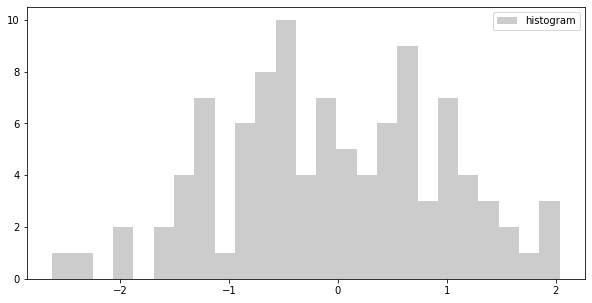

In [29]:
plt.figure(figsize = (10,5)) # figsize ; 차트 사이즈
plt.hist(b, bins=25, color = 'k', alpha = 0.2, label = 'histogram')
# bins ; 계급구간 / alpha ; 투명도
plt.legend() # legend ; 그래프 상 레이블까지 표현해준다.

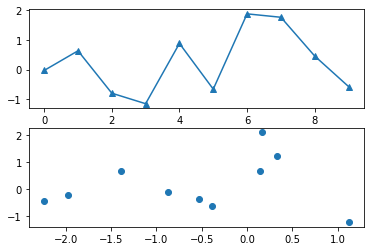

In [30]:
# 여러 그래프 1

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(np.random.randn(10), marker = '^')
ax2.scatter(x=np.random.randn(10), y=np.random.randn(10))
plt.show()

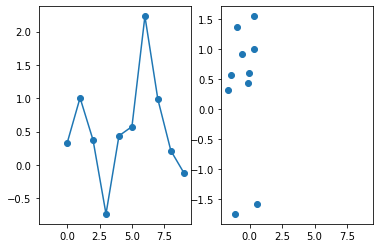

In [31]:
# 여러 그래프 2

fig, axes = plt.subplots(1,2, sharex = True, sharey = False)

axes[0].plot(np.random.randn(10), marker = 'o')
axes[1].scatter(x = np.random.randn(10), y = np.random.randn(10), marker = 'o')

plt.show()

---

In [32]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [34]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [35]:
iris['data'] # feature data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

- iris 자체가 딕셔너리 형태
- iris dataset에서 petal length와 petal width의 관계를 살펴보기 위해, 적절한 그래프의 형태는? -> 산점도

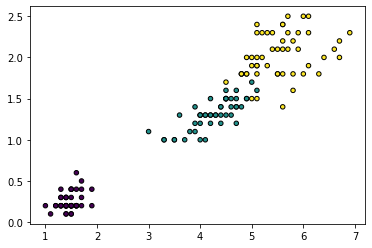

In [40]:
plt.scatter(x = iris.data[:,2],
           y = iris.data[:,3],
           edgecolor = 'k', s = 20,       # s ; size
           c = iris.target)               # c ; class 구분

Text(0.5, 1.0, 'iris petal scatter')

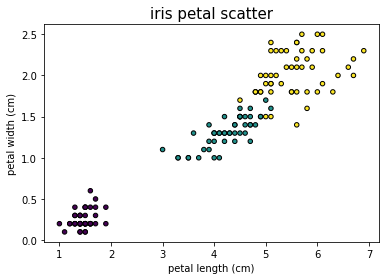

In [42]:
plt.scatter(x = iris.data[:,2],
           y = iris.data[:,3],
           edgecolor = 'k', s = 20,       # s ; size
           c = iris.target)               # c ; class 구분
plt.xlabel(iris.feature_names[2], fontsize = 10)
plt.ylabel(iris.feature_names[3], fontsize = 10)

plt.title('iris petal scatter', fontsize = 15)

---

[연습]

- 1. 아래와 같은 데이터 프레임을 생성하고 합계 컬럼과 평균 컬럼을 추가해보세요(람다 표현식 사용)


- 2. 시각화 ; 2by2 그래프를 for 문을 활용해 plotting / 단 np.random.randn(1000), bins = 20 활용

In [45]:
score = {'이름' : ['A', 'B', 'C'],
        'math' : [72, 84, 91],
        'eng' : [80, 82, 79]}
score_df = pd.DataFrame(score)
score_df

,이름,math,eng
0,A,72,80
1,B,84,82
2,C,91,79


In [49]:
f1 = lambda x: x.sum()

score_df['합계'] = score_df[['math', 'eng']].apply(f1, axis=1)
score_df

,이름,math,eng,합계
0,A,72,80,152
1,B,84,82,166
2,C,91,79,170


In [50]:
f2 = lambda x: x.mean()

score_df['평균'] = score_df[['math', 'eng']].apply(f2, axis = 1)
score_df

,이름,math,eng,합계,평균
0,A,72,80,152,76.0
1,B,84,82,166,83.0
2,C,91,79,170,85.0


In [51]:
# 교수님 풀이

score_df['합계'] = score_df[['math', 'eng']].apply(lambda x: x.sum(), axis = 1)
score_df['평균'] = score_df[['math', 'eng']].apply(lambda x: x.mean(), axis = 1)

score_df

,이름,math,eng,합계,평균
0,A,72,80,152,76.0
1,B,84,82,166,83.0
2,C,91,79,170,85.0


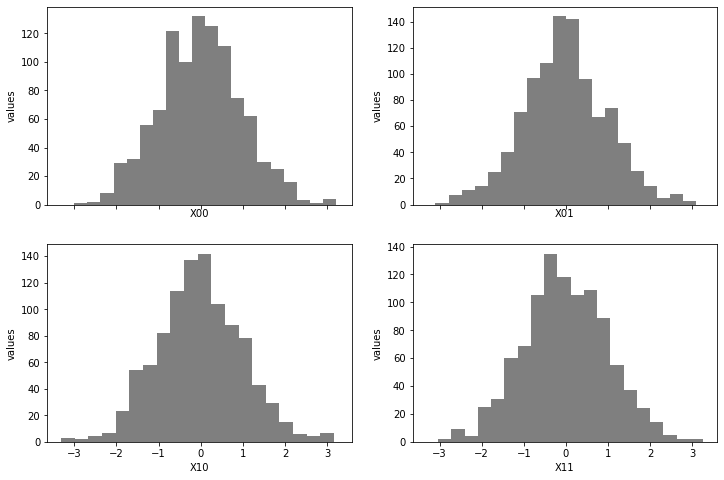

In [55]:
fig, axes = plt.subplots(2,2, sharex = True, sharey = False, figsize = (12, 8))

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(1000), bins = 20, color = 'k', alpha = 0.5)
        axes[i, j].set_xlabel('X{}{}'.format(i, j))
        axes[i, j].set_ylabel('values')

plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

---

[연습문제]

- 데이터 프레임 생성

; 위와 같은 머신러닝을 위한 데이터는 numpy array로 준비하지만, 데이터 분석을 위해서는 불편함

; 따라서 분석에 용이하도록 데이터프레임으로 생성

- 변수 4개, 타겟 1개

; 타겟2 칼럼 추가해 품종 이름 추가할 것

In [57]:
example1 = pd.concat([pd.DataFrame(iris['data'], columns = iris.feature_names),
                     pd.DataFrame(iris['target'], columns = ['target'])], axis = 1)
example1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
example1['target2'] = np.where(example1.target == 0, iris.target_names[0],
                              np.where(example1.target == 1, iris.target_names[1],
                                      iris.target_names[2]))
example1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
# 파이차트 ; 1,2,3,4사분면 순으로, 내가 넣은 이름 순서로 자료가 들어간다.

## 이 부분 코딩 누락